In [53]:
#import dependencies
import pandas as pd
import os
import matplotlib as plt
from matplotlib import pyplot as plt
import numpy as np
from pandas import ExcelWriter
from pandas import ExcelFile
from IPython.display import clear_output
from scipy import stats

In [6]:
GDP_data = pd.read_excel('AnnualGDP.xls', sheet_name='Data')

GDP_data

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,ABW,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,-10.607946,-3.889655,3.056813,-1.873701,3.582254,0.257489,-0.971512,-0.669129,0.905028,NaN
1,Afghanistan,AFG,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,18.311587,11.190678,-2.634349,9.121968,2.157239,-0.493889,-1.491121,-0.452987,0.139700,NaN
2,Angola,AGO,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,-2.675336,1.181679,-0.157161,4.746547,1.312474,1.232061,-2.458152,-5.806158,-3.401622,NaN
3,Albania,ALB,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,4.048822,4.226161,2.826249,1.587635,1.185213,1.980930,2.518104,3.515369,3.931088,NaN
4,Andorra,AND,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,-4.375955,-5.344257,-3.851846,-0.039744,2.392514,4.298114,2.404977,2.855529,2.291464,NaN
5,Arab World,ARB,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.935114,2.291948,1.226722,4.291718,0.866776,0.262043,1.198868,1.172807,-0.981692,NaN
6,United Arab Emirates,ARE,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,-14.786310,-5.820719,1.976251,1.808336,3.819128,3.655154,4.107111,1.707310,-0.609203,NaN
7,Argentina,ARG,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,NaN,3.747273,-2.410454,-6.771626,8.464397,8.934659,...,-6.880149,8.991438,4.902125,-2.060575,1.338453,-3.514196,1.698945,-2.784592,1.870295,NaN
8,Armenia,ARM,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,-13.566398,2.600409,4.762989,6.964131,2.886337,3.146882,2.820379,-0.069478,7.293324,NaN
9,American Samoa,ASM,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,-2.869663,1.507615,0.868398,-4.236589,-2.891894,0.708166,1.065743,-2.728006,-5.451170,NaN


In [7]:
bcg_data = pd.read_excel('immunization_data.xlsx', sheetname='BCG')
bcg_data.head()

,unicef_region,iso3,country,vaccine,2017,2016,2015,2014,2013,2012,...,1989,1988,1987,1986,1985,1984,1983,1982,1981,1980
0,South Asia,AFG,Afghanistan,BCG,74.0,74.0,74.0,74.0,72.0,78.0,...,38.0,40.0,27.0,18.0,17.0,11.0,10.0,10.0,NaN,NaN
1,Eastern Europe & Central Asia,ALB,Albania,BCG,99.0,99.0,99.0,99.0,99.0,96.0,...,94.0,92.0,92.0,92.0,92.0,90.0,90.0,92.0,93.0,93.0
2,Middle East & North Africa,DZA,Algeria,BCG,99.0,99.0,99.0,99.0,99.0,99.0,...,96.0,96.0,93.0,88.0,86.0,NaN,NaN,NaN,NaN,NaN
3,Eastern & Southern Africa,AGO,Angola,BCG,83.0,49.0,69.0,72.0,71.0,74.0,...,47.0,32.0,29.0,32.0,28.0,28.0,25.0,NaN,NaN,NaN
4,Latin America & Caribbean,ARG,Argentina,BCG,95.0,92.0,96.0,99.0,99.0,99.0,...,92.0,91.0,94.0,99.0,90.0,78.0,70.0,77.0,70.0,62.0


In [16]:
years_bcg  = list(bcg_data.columns.values[4:])
print(years_bcg)
country_list = list(bcg_data['country'])
country_list

['2017', '2016', '2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008', '2007', '2006', '2005', '2004', '2003', '2002', '2001', '2000', '1999', '1998', '1997', '1996', '1995', '1994', '1993', '1992', '1991', '1990', '1989', '1988', '1987', '1986', '1985', '1984', '1983', '1982', '1981', '1980']


['Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Argentina',
 'Armenia',
 'Austria',
 'Azerbaijan',
 'Bangladesh',
 'Belarus',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia (Plurinational State of)',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Cook Islands',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Czechia',
 "Democratic People's Republic of Korea",
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Ghana',
 'Greece',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Honduras',
 'Hungary',
 'India',
 'Indonesia',
 'Iran (Islamic Rep

In [18]:
new_GDP = GDP_data[['Country Name','Country Code','2017', '2016', '2015', '2014', '2013', '2012', '2011', 
            '2010', '2009', '2008', '2007', '2006', '2005', '2004', '2003', '2002', '2001', '2000', 
            '1999', '1998', '1997', '1996', '1995', '1994', '1993', '1992', '1991', '1990', '1989', '1988', 
            '1987', '1986', 
            '1985', '1984', '1983', '1982', '1981', '1980']]
new_GDP

,Country Name,Country Code,2017,2016,2015,2014,2013,2012,2011,2010,...,1989,1988,1987,1986,1985,1984,1983,1982,1981,1980
0,Aruba,ABW,0.905028,-0.669129,-0.971512,0.257489,3.582254,-1.873701,3.056813,-3.889655,...,12.216190,20.113327,17.600913,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,0.139700,-0.452987,-1.491121,-0.493889,2.157239,9.121968,-2.634349,11.190678,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,-3.401622,-5.806158,-2.458152,1.232061,1.312474,4.746547,-0.157161,1.181679,...,-2.608189,3.403304,1.325048,-0.039672,0.263786,2.433853,0.534102,-3.523727,-7.653439,NaN
3,Albania,ALB,3.931088,3.515369,2.518104,1.980930,1.185213,1.587635,2.826249,4.226161,...,6.923617,-3.262522,-2.749496,3.614656,-0.290595,-3.307497,-1.016802,0.795840,3.648649,NaN
4,Andorra,AND,2.291464,2.855529,2.404977,4.298114,2.392514,-0.039744,-3.851846,-5.344257,...,0.801683,0.970488,1.325673,-1.001824,-2.023787,-2.598352,-2.595336,-2.931373,-3.948746,-1.330760
5,Arab World,ARB,-0.981692,1.172807,1.198868,0.262043,0.866776,4.291718,1.226722,2.291948,...,-0.436219,2.650914,-3.333990,1.663854,-5.172981,-1.658966,-9.661735,-11.875241,-0.308655,5.650123
6,United Arab Emirates,ARE,-0.609203,1.707310,4.107111,3.655154,3.819128,1.808336,1.976251,-5.820719,...,5.928263,-8.213597,-2.480260,-19.646646,-8.624148,-1.143985,-9.574057,-12.102259,-2.671914,13.138479
7,Argentina,ARG,1.870295,-2.784592,1.698945,-3.514196,1.338453,-2.060575,4.902125,8.991438,...,-8.503814,-2.549044,1.166486,4.541804,-6.648776,-0.011728,2.716794,-2.278420,-6.642918,-0.003151
8,Armenia,ARM,7.293324,-0.069478,2.820379,3.146882,2.886337,6.964131,4.762989,2.600409,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,American Samoa,ASM,-5.451170,-2.728006,1.065743,0.708166,-2.891894,-4.236589,0.868398,1.507615,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
#Geting data for Country argentina
gdp_ind = new_GDP.loc[new_GDP['Country Name']=='India']
gdp_ind.set_index('Country Name')

gdp_ind

,Country Name,Country Code,2017,2016,2015,2014,2013,2012,2011,2010,...,1989,1988,1987,1986,1985,1984,1983,1982,1981,1980
107,India,IND,5.48556,5.889836,6.899036,6.140334,5.096692,4.134719,5.248535,8.763184,...,3.736988,7.302964,1.723703,2.480293,2.908434,1.471103,4.835436,1.101035,3.57805,4.305148


In [ ]:
data_gnp
gdp_india = pd.DataFrame(gdp_ind)
gdp_india.sort_values(by='year')
gnp_arg.dtypes

In [26]:
indGDP_data = []
for year in years_bcg:
    
        
        
        gdp_tmp_df = new_GDP[(new_GDP['Country Name'] == 'India')]
        tmp_gdp = gdp_tmp_df[str(year)]
        try:
            indGDP_data.append({'year' : year, 'GDP': list(tmp_gdp.values)[0]})
        except IndexError:
            pass

In [27]:
indGDP_data

[{'year': '2017', 'GDP': 5.485559963354319},
 {'year': '2016', 'GDP': 5.889836402712504},
 {'year': '2015', 'GDP': 6.89903559931291},
 {'year': '2014', 'GDP': 6.140334036302335},
 {'year': '2013', 'GDP': 5.096691726534303},
 {'year': '2012', 'GDP': 4.134718971833237},
 {'year': '2011', 'GDP': 5.2485353293175905},
 {'year': '2010', 'GDP': 8.763184413516598},
 {'year': '2009', 'GDP': 6.950038737994049},
 {'year': '2008', 'GDP': 2.37524929822537},
 {'year': '2007', 'GDP': 8.153567259683484},
 {'year': '2006', 'GDP': 7.584629577495392},
 {'year': '2005', 'GDP': 7.567120159807004},
 {'year': '2004', 'GDP': 6.187574525265262},
 {'year': '2003', 'GDP': 6.086693621691737},
 {'year': '2002', 'GDP': 2.058116150138403},
 {'year': '2001', 'GDP': 3.0212362847765775},
 {'year': '2000', 'GDP': 2.0155589327198555},
 {'year': '1999', 'GDP': 6.892479990728589},
 {'year': '1998', 'GDP': 4.243707663612},
 {'year': '1997', 'GDP': 2.1186292282916668},
 {'year': '1996', 'GDP': 5.5267969341130225},
 {'year': 

In [28]:
Ind_gdp = pd.DataFrame(indGDP_data)

In [29]:
Ind_gdp

,GDP,year
0,5.485560,2017
1,5.889836,2016
2,6.899036,2015
3,6.140334,2014
4,5.096692,2013
5,4.134719,2012
6,5.248535,2011
7,8.763184,2010
8,6.950039,2009
9,2.375249,2008


In [40]:
indbcg_data = []
for year in years_bcg:
    
        
        
        bcg_tmp_df = bcg_data[(bcg_data['country'] == 'India')]
        tmp_bcg = bcg_tmp_df[str(year)]
        try:
            indbcg_data.append({'year':year, 'BCG': list(tmp_bcg.values)[0]})
        except IndexError:
            pass

In [36]:
indbcg_data

[{'Years': '2017', 'BCG': 91.0},
 {'Years': '2016', 'BCG': 89.0},
 {'Years': '2015', 'BCG': 87.0},
 {'Years': '2014', 'BCG': 89.0},
 {'Years': '2013', 'BCG': 91.0},
 {'Years': '2012', 'BCG': 90.0},
 {'Years': '2011', 'BCG': 90.0},
 {'Years': '2010', 'BCG': 89.0},
 {'Years': '2009', 'BCG': 88.0},
 {'Years': '2008', 'BCG': 86.0},
 {'Years': '2007', 'BCG': 87.0},
 {'Years': '2006', 'BCG': 86.0},
 {'Years': '2005', 'BCG': 86.0},
 {'Years': '2004', 'BCG': 80.0},
 {'Years': '2003', 'BCG': 77.0},
 {'Years': '2002', 'BCG': 75.0},
 {'Years': '2001', 'BCG': 75.0},
 {'Years': '2000', 'BCG': 74.0},
 {'Years': '1999', 'BCG': 74.0},
 {'Years': '1998', 'BCG': 73.0},
 {'Years': '1997', 'BCG': 72.0},
 {'Years': '1996', 'BCG': 79.0},
 {'Years': '1995', 'BCG': 81.0},
 {'Years': '1994', 'BCG': 71.0},
 {'Years': '1993', 'BCG': 69.0},
 {'Years': '1992', 'BCG': 65.0},
 {'Years': '1991', 'BCG': 62.0},
 {'Years': '1990', 'BCG': 66.0},
 {'Years': '1989', 'BCG': 28.0},
 {'Years': '1988', 'BCG': 23.0},
 {'Years':

In [43]:
bcg_ind = pd.DataFrame(indbcg_data)

In [44]:
#bcg_ind

,BCG,year
0,91.0,2017
1,89.0,2016
2,87.0,2015
3,89.0,2014
4,91.0,2013
5,90.0,2012
6,90.0,2011
7,89.0,2010
8,88.0,2009
9,86.0,2008


In [48]:
GDP_BCG_df = pd.merge(Ind_gdp, bcg_ind, on='year', how='left')
#DTP_Immunization = dtp_arg['DTP']
#filtered_tb_arg.merge(dtp_arg, on='year')
#merged_df=merged_df.rename(columns={"DTP":"DTP1"})

In [79]:
sort_data=GDP_BCG_df.sort_values(by=['year'])
sort_data.head()

,GDP,year,BCG
37,4.305148,1980,NaN
36,3.578050,1981,4.0
35,1.101035,1982,4.0
34,4.835436,1983,6.0
33,1.471103,1984,7.0


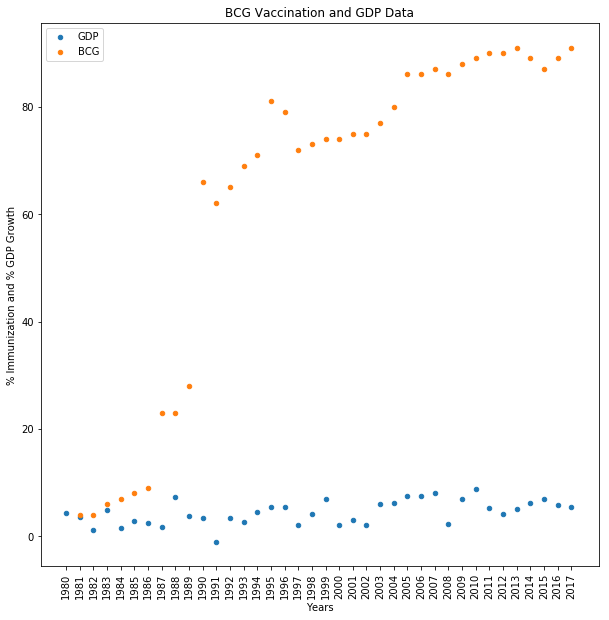

In [72]:
plt.figure(figsize = (10,10))
plt.scatter(sort_data['year'],sort_data['GDP'], s=20, label='GDP')
plt.scatter(sort_data['year'],sort_data['BCG'], s=20)
#plt.scatter(crimes_with_education['highschool %'],crimes_with_education['crime_count'], s=10, label='Highschool Degree')               
#plt.scatter(crimes_with_education['higher %'],crimes_with_education['crime_count'], s=10, label='Post-secondary Degree')            
plt.xticks(sort_data['year'],  rotation='vertical')

plt.legend()
plt.title('BCG Vaccination and GDP Data')
plt.xlabel('Years')
plt.ylabel('% Immunization and % GDP Growth')
plt.show()

In [76]:
import seaborn as sns
sns.set(color_codes=True)

In [80]:
tips = sns.load_dataset("sort_data")


HTTPError: HTTP Error 404: Not Found

In [81]:
sns.regplot(x=sort_data['year'],y=tip, data=tips);

NameError: name 'tip' is not defined

In [82]:

import statsmodels.api as sm

X = df["RM"]
y = target["MEDV"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

ModuleNotFoundError: No module named 'statsmodels'

In [73]:
import plotly.plotly as py
from plotly.graph_objs import *
py.sign_in('username', 'api_key')

x=list(sort_data['GDP'])
y=list(sort_data['BCG'])

In [ ]:
trace1 = {
  "x": x,
  "y": y,
  "name": "Education", 
  "text": ["Mexico", "Turkey", "Chile ", "Argentina ", "Croatia", "Switzerland", "France", "Spain", "Austria", "Denmark", "South Af", "Israel", "Germany", "Japan", "Czech Rep", "Canada", "USA"], 
  "type": "scatter", 
  "uid": "fde3a4"
}